In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
#Train, test splitting
import splitfolders

input_folder ="C:/Users/Swathi/IBM/Flowers-Dataset/flowers"
splitfolders.ratio(input_folder, output="C:/Users/Swathi/IBM/Flowers-Dataset/flowers/split",
   seed=42, ratio=(.8, .2), group_prefix=None, move=False) 


Copying files: 0 files [00:00, ? files/s]
Copying files: 38 files [00:00, 344.86 files/s]
Copying files: 115 files [00:00, 538.45 files/s]
Copying files: 185 files [00:00, 602.12 files/s]
Copying files: 250 files [00:00, 619.68 files/s]
Copying files: 325 files [00:00, 662.91 files/s]
Copying files: 402 files [00:00, 668.05 files/s]
Copying files: 469 files [00:00, 663.92 files/s]
Copying files: 536 files [00:00, 633.28 files/s]
Copying files: 600 files [00:01, 507.57 files/s]
Copying files: 684 files [00:01, 570.03 files/s]
Copying files: 756 files [00:01, 607.72 files/s]
Copying files: 820 files [00:01, 526.95 files/s]
Copying files: 877 files [00:01, 512.09 files/s]
Copying files: 942 files [00:01, 545.22 files/s]
Copying files: 1029 files [00:01, 608.97 files/s]
Copying files: 1106 files [00:01, 649.96 files/s]
Copying files: 1175 files [00:01, 654.40 files/s]
Copying files: 1242 files [00:03, 177.85 files/s]
Copying files: 1324 files [00:03, 236.99 files/s]
Copying files: 1405 fi

# 2) Data Augmentation

In [36]:
#Creating augmentation on training variable
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

In [37]:
#Creating augmentation on testing variable
test_datagen=ImageDataGenerator(rescale=1./255)

In [38]:
#passing training data to train variable
xtrain=train_datagen.flow_from_directory("C:/Users/Swathi/IBM/Flowers-Dataset/flowers/split/train",target_size=(64,64),class_mode='categorical',batch_size=100)


Found 3452 images belonging to 5 classes.


In [39]:
#passing testing data to test variable
xtest=test_datagen.flow_from_directory("C:/Users/Swathi/IBM/Flowers-Dataset/flowers/split/val",target_size=(64,64),class_mode='categorical',batch_size=100)


Found 865 images belonging to 5 classes.


# Building CNN Model and Adding layers

In [40]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [41]:
#creating CNN block
model=Sequential()
#adding layers
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))#hidden layer1
model.add(Dense(150,activation='relu'))#hidden layer2
model.add(Dense(5,activation='softmax'))#Output layer

# Compile the model 

In [42]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Training the model

In [44]:
model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=20,validation_data=xtest,validation_steps=len(xtest))

C:\Users\Swathi\AppData\Local\Temp/ipykernel_11820/2525994468.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=20,validation_data=xtest,validation_steps=len(xtest))


Epoch 1/20
35/35 [==============================] - 21s 609ms/step - loss: 0.8615 - accuracy: 0.6709 - val_loss: 0.9744 - val_accuracy: 0.6173
Epoch 2/20
35/35 [==============================] - 42s 1s/step - loss: 0.8383 - accuracy: 0.6773 - val_loss: 0.9945 - val_accuracy: 0.6116
Epoch 3/20
35/35 [==============================] - 25s 668ms/step - loss: 0.7904 - accuracy: 0.6987 - val_loss: 0.9897 - val_accuracy: 0.6312
Epoch 4/20
35/35 [==============================] - 22s 636ms/step - loss: 0.7459 - accuracy: 0.7129 - val_loss: 1.0155 - val_accuracy: 0.6127
Epoch 5/20
35/35 [==============================] - 23s 639ms/step - loss: 0.7253 - accuracy: 0.7233 - val_loss: 0.8652 - val_accuracy: 0.6740
Epoch 6/20
35/35 [==============================] - 23s 653ms/step - loss: 0.7122 - accuracy: 0.7315 - val_loss: 1.0904 - val_accuracy: 0.5954
Epoch 7/20
35/35 [==============================] - 22s 627ms/step - loss: 0.6730 - accuracy: 0.7567 - val_loss: 0.8815 - val_accuracy: 0.6705
Ep

# Saving the model

In [45]:
model.save('flower.h5')

# Testing the model

In [54]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [58]:
img=image.load_img('C:/Users/Swathi/IBM/Flowers-Dataset/flowers/split/val/tulip/12916441224_2ed63596f8_n.jpg',target_size=(64,64))

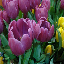

In [59]:
img

In [60]:
x=image.img_to_array(img)
x

Copying files: 1770 files [01:50, 25.34 files/s]

array([[[147.,  89.,  41.],
        [133.,  77.,  42.],
        [140.,  86., 118.],
        ...,
        [149.,  90., 136.],
        [139.,  84., 123.],
        [143.,  71., 117.]],

       [[141.,  81.,  44.],
        [134.,  78.,  41.],
        [127.,  64.,  95.],
        ...,
        [131.,  66., 100.],
        [130.,  57., 100.],
        [125.,  65., 101.]],

       [[149.,  87.,  40.],
        [140.,  78.,  27.],
        [110.,  40.,  74.],
        ...,
        [128.,  51.,  87.],
        [125.,  60., 103.],
        [100.,  38.,  75.]],

       ...,

       [[151., 134.,  46.],
        [136., 106.,  16.],
        [135., 113.,   4.],
        ...,
        [  0.,   1.,   0.],
        [  5.,   7.,   4.],
        [  7.,  13.,  13.]],

       [[154., 137.,  59.],
        [125., 106.,  14.],
        [136., 119.,   5.],
        ...,
        [ 18.,  31.,  21.],
        [  0.,   0.,   0.],
        [  8.,  14.,  14.]],

       [[138., 125.,  33.],
        [128., 113.,  10.],
        [117., 1

In [61]:
x=np.expand_dims(x,axis=0)
x

array([[[[147.,  89.,  41.],
         [133.,  77.,  42.],
         [140.,  86., 118.],
         ...,
         [149.,  90., 136.],
         [139.,  84., 123.],
         [143.,  71., 117.]],

        [[141.,  81.,  44.],
         [134.,  78.,  41.],
         [127.,  64.,  95.],
         ...,
         [131.,  66., 100.],
         [130.,  57., 100.],
         [125.,  65., 101.]],

        [[149.,  87.,  40.],
         [140.,  78.,  27.],
         [110.,  40.,  74.],
         ...,
         [128.,  51.,  87.],
         [125.,  60., 103.],
         [100.,  38.,  75.]],

        ...,

        [[151., 134.,  46.],
         [136., 106.,  16.],
         [135., 113.,   4.],
         ...,
         [  0.,   1.,   0.],
         [  5.,   7.,   4.],
         [  7.,  13.,  13.]],

        [[154., 137.,  59.],
         [125., 106.,  14.],
         [136., 119.,   5.],
         ...,
         [ 18.,  31.,  21.],
         [  0.,   0.,   0.],
         [  8.,  14.,  14.]],

        [[138., 125.,  33.],
       

In [62]:
model.predict(x)

1/1 [==============================] - 0s 109ms/step


array([[0., 0., 0., 0., 1.]], dtype=float32)

In [63]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [64]:
op=['daisy','dandelion','rose','sunflower','tulip']
pred=np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 188ms/step


'tulip'